<h2 style='color:blue' align='center'>Small Image Classification Using Artificial Neural Network (ANN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use ANN for classification

<img src="small_images.jpg" />

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

What is the percentage of data division? 80:20? or something else? calculate

In [3]:
X_test.shape

(10000, 32, 32, 3)

what is the interpretation of 32  * 31 * 3?

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [21]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [23]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

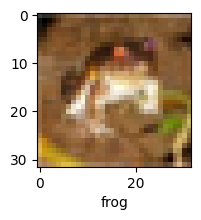

In [10]:
plot_sample(X_train, y_train, 0)

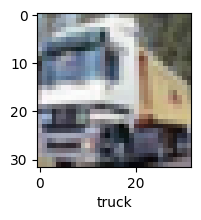

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

In [31]:
# Parameter Calculations
3072*100
100*100
10000*10
307200 + 10000 +1000 +100+ 100+ 10

318410

In [15]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 318410 (1.21 MB)
Trainable params: 318410 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


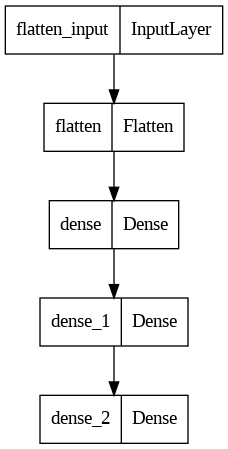

In [16]:
import pydot
from tensorflow import keras
keras.utils.plot_model(ann)

In [17]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 14s 8ms/step - loss: 1.8985 - accuracy: 0.3169
Epoch 2/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.7177 - accuracy: 0.3922
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6386 - accuracy: 0.4174
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5828 - accuracy: 0.4371
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5468 - accuracy: 0.4530


**You can see that at the end of 5 epochs, accuracy is at around 45.3%**

In [19]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.58      0.52      1000
           1       0.55      0.55      0.55      1000
           2       0.35      0.29      0.32      1000
           3       0.41      0.17      0.24      1000
           4       0.44      0.31      0.37      1000
           5       0.33      0.43      0.37      1000
           6       0.55      0.38      0.45      1000
           7       0.49      0.48      0.49      1000
           8       0.62      0.47      0.54      1000
           9       0.36      0.73      0.48      1000

    accuracy                           0.44     10000
   macro avg       0.46      0.44      0.43     10000
weighted avg       0.46      0.44      0.43     10000

